In [1]:
# from datetime import datetime
# import datetime as dt
# import pandas_datareader as web
# from pandas_datareader.data import DataReader
# import yfinance as yf
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

# # sns.set_style('whitegrid')
# # plt.style.use('fivethirtyeight')
# %matplotlib inline

# YEARS = 17

# techlist = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# end = datetime.now()
# start = datetime(end.year - YEARS, end.month, end.day)

# for stock in techlist:
#     globals()[stock] = yf.download(stock, start, end)

# LSTM

In [2]:
from datetime import datetime
import datetime as dt
import pandas_datareader as web
from pandas_datareader.data import DataReader
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# sns.set_style('whitegrid')
# plt.style.use('fivethirtyeight')
%matplotlib inline

YEARS = 17
end = datetime.now()
start = datetime(end.year - YEARS, end.month, end.day)

In [3]:
# df = DataReader('GOOG', data_source='yahoo', start=datetime(end.year - YEARS, end.month, end.day), end=datetime(end.year, end.month, end.day))
df = pd.read_csv('hpq.us_1970-to-2017.txt')
data = df.filter(['Close'])
dataset = data.values

train_size = int(np.ceil( len(dataset) * .90))

train_size

10868

In [4]:
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,0.30627,0.30627,0.30627,0.30627,2441124,0
1,1970-01-05,0.30627,0.31768,0.30627,0.31385,6219848,0
2,1970-01-06,0.31385,0.31385,0.30996,0.30996,4447522,0
3,1970-01-07,0.31385,0.31385,0.31385,0.31385,1872638,0
4,1970-01-08,0.31385,0.31768,0.31385,0.31385,4280330,0
...,...,...,...,...,...,...,...
12070,2017-11-06,21.47000,21.53000,21.38000,21.44000,13309476,0
12071,2017-11-07,21.47000,21.47000,21.32000,21.38000,6245536,0
12072,2017-11-08,21.34000,21.47000,21.24000,21.42000,6061868,0
12073,2017-11-09,21.27000,21.40000,21.15000,21.34000,5844935,0


Text(0.5, 1.0, 'Closing Price of Google')

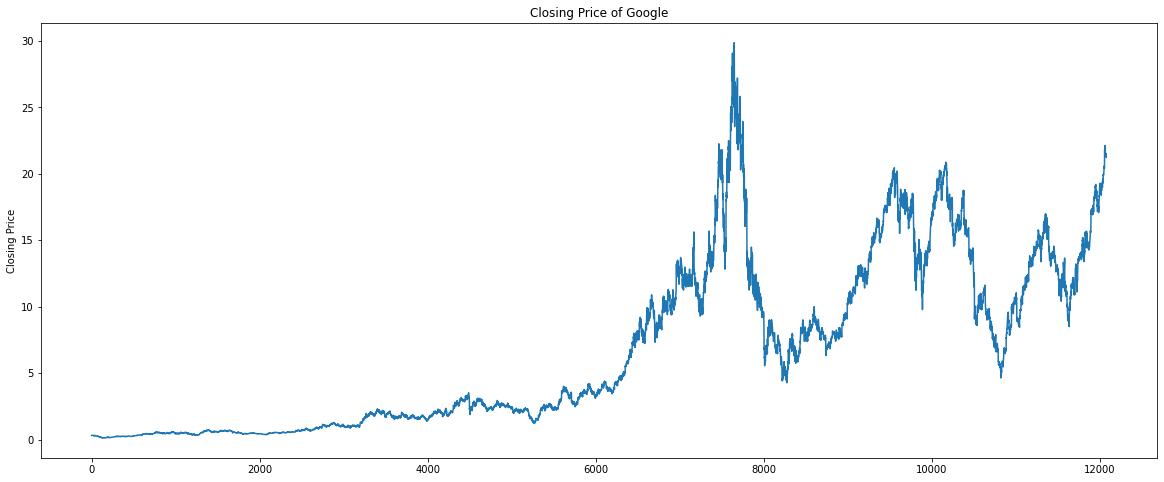

In [5]:
plt.figure(figsize=(20,8))

df['Close'].plot()
plt.ylabel('Closing Price')
plt.title("Closing Price of Google")

Text(0.5, 1.0, 'Sales Volume of Google')

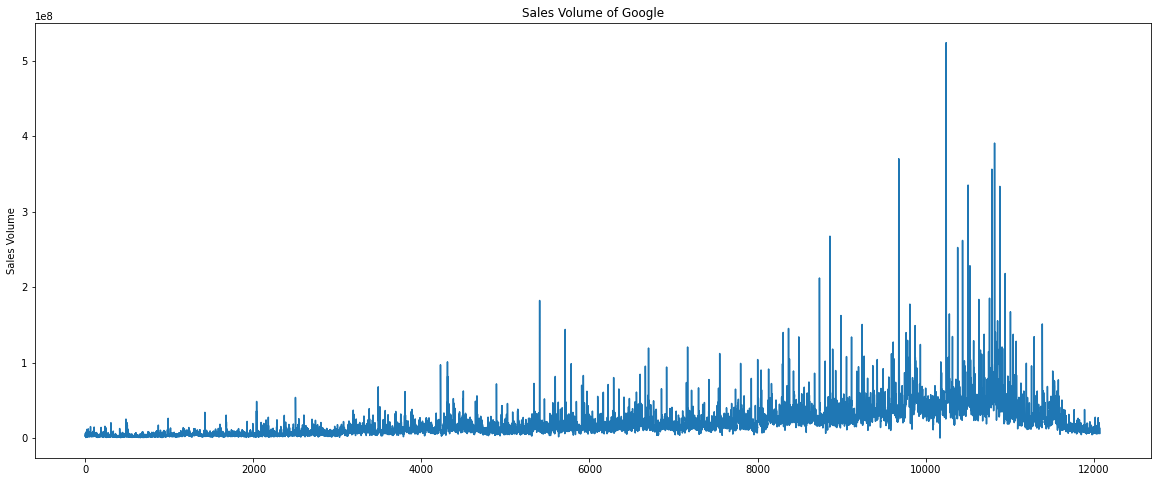

In [6]:
plt.figure(figsize=(20,8))
df['Volume'].plot()
plt.ylabel('Sales Volume')
plt.title("Sales Volume of Google")

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(dataset)
scaled_dataset

array([[0.00643699],
       [0.00669184],
       [0.00656105],
       ...,
       [0.7163288 ],
       [0.71363901],
       [0.70994056]])

In [8]:
train_data = scaled_dataset[0:int(train_size), :]
prediction_days = 60 #time steps (stamps)

x_train, y_train = [], []

for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0])
    y_train.append(train_data[i, 0])
    if i <= (prediction_days + 1):
        print(x_train)
        print(y_train)
        print()
    

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00643699, 0.00669184, 0.00656105, 0.00669184, 0.00669184,
       0.00682062, 0.00707816, 0.00694973, 0.00694973, 0.0072066 ,
       0.00707816, 0.00694973, 0.0072066 , 0.0072066 , 0.0072066 ,
       0.00694973, 0.00682062, 0.00656105, 0.00643699, 0.00630485,
       0.0061791 , 0.0061791 , 0.0061791 , 0.00604697, 0.00579077,
       0.00630485, 0.0061791 , 0.0061791 , 0.00630485, 0.00630485,
       0.00630485, 0.00656105, 0.00656105, 0.00669184, 0.00592189,
       0.00592189, 0.00604697, 0.00604697, 0.00604697, 0.0061791 ,
       0.00566233, 0.00566233, 0.00579077, 0.00566233, 0.00566233,
       0.00527903, 0.00540613, 0.00540613, 0.00527903, 0.00527903,
       0.00527903, 0.00553456, 0.00553456, 0.00540613, 0.00527903,
       0.00502115, 0.00502115, 0.00514724, 0.00514724, 0.00502115])]
[0.005021151778383427]

[array([0.00643699, 0.00669184, 0.00656105, 0.00669184, 0.00669184,
       0.00682062, 0.00707816, 0.00694973, 0.00694973, 0.0072066 ,
       0.00707816, 0.00694973, 0.0

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

DROPOUT_UNIT = 0.2

def LSTM_Exp():
    model = Sequential()

    model.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(DROPOUT_UNIT))

    # model.add(LSTM(units = 64, return_sequences= True))
    # model.add(Dropout(DROPOUT_UNIT))

    # model.add(LSTM(units= 64, return_sequences= True))
    # model.add(Dropout(DROPOUT_UNIT))
    
    model.add(LSTM(units= 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))
    
    model.add(LSTM(units= 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))
    
    model.add(LSTM(units = 64))
    model.add(Dropout(DROPOUT_UNIT))

    model.add(Dense(25))
    model.add(Dense(1))

    return model

In [10]:
# from tensorflow.keras.optimizers import Adam

# adam = Adam(learning_rate=5e-3)

model = LSTM_Exp()
model.summary()
model.compile(optimizer='adam', loss=['mean_squared_error', 'mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                3

In [11]:
def f1_score(new_pred, new_ytest):
    TP = 0
    FN = 0
    FP = 0

    for i in range(len(new_pred) - 1):
        test_prof = new_ytest[i+1] - new_ytest[i]
        p_prof = new_pred[i+1] - new_pred[1]
        if((test_prof>=0) and (p_prof>=0)):
            TP=TP+1
        if ((test_prof>= 0) and (p_prof<0)):
            FN=FN+1
        if ((test_prof<0) and (p_prof>=0)):
            FP=FP + 1
    
    precision = float(TP) / float(TP+FP)
    recall = float(TP) / float(TP+FN)
    f1 = 2.0 * precision * recall / (precision + recall)
    print('PRECISION SCORE: %.5f' % (recall))
    print('RECALL SCORE: %.5f' % (precision))
    print('F1 SCORE: %.5f' % (f1))
    return f1, precision, recall

In [12]:
# checkpoint = ModelCheckpoint(filepath = 'weights_best.hdf5', 
#                                verbose = 2, 
#                                save_best_only = True)
EPOCHS = 50
BATCH_SIZE = 64

In [13]:
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
169/169 [==============================] - 17s 79ms/step - loss: 0.0029
Epoch 2/50
169/169 [==============================] - 14s 80ms/step - loss: 9.3408e-04
Epoch 3/50
169/169 [==============================] - 14s 83ms/step - loss: 7.6991e-04
Epoch 4/50
169/169 [==============================] - 14s 84ms/step - loss: 7.3184e-04
Epoch 5/50
169/169 [==============================] - 14s 84ms/step - loss: 6.0815e-04
Epoch 6/50
169/169 [==============================] - 14s 84ms/step - loss: 6.1792e-04
Epoch 7/50
169/169 [==============================] - 15s 86ms/step - loss: 5.9526e-04
Epoch 8/50
169/169 [==============================] - 15s 87ms/step - loss: 5.8979e-04
Epoch 9/50
169/169 [==============================] - 15s 87ms/step - loss: 6.1853e-04
Epoch 10/50
169/169 [==============================] - 15s 89ms/step - loss: 5.1340e-04
Epoch 11/50
169/169 [==============================] - 15s 88ms/step - loss: 5.4416e-04
Epoch 12/50
169/169 [========================

In [14]:
test_data = scaled_dataset[train_size - prediction_days: , :]
x_test = []
y_test = dataset[train_size:, :]
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

new_ytest = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

rmse

0.5029721055820913

In [15]:
mae = np.mean(y_test - predictions)
mae

-0.39011869617263045

In [16]:
f1, precision, recall = f1_score(predictions, new_ytest)

PRECISION SCORE: 0.99694
RECALL SCORE: 0.54288
F1 SCORE: 0.70296


C:\Users\ADRIC\AppData\Local\Temp\ipykernel_43148\2856021547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


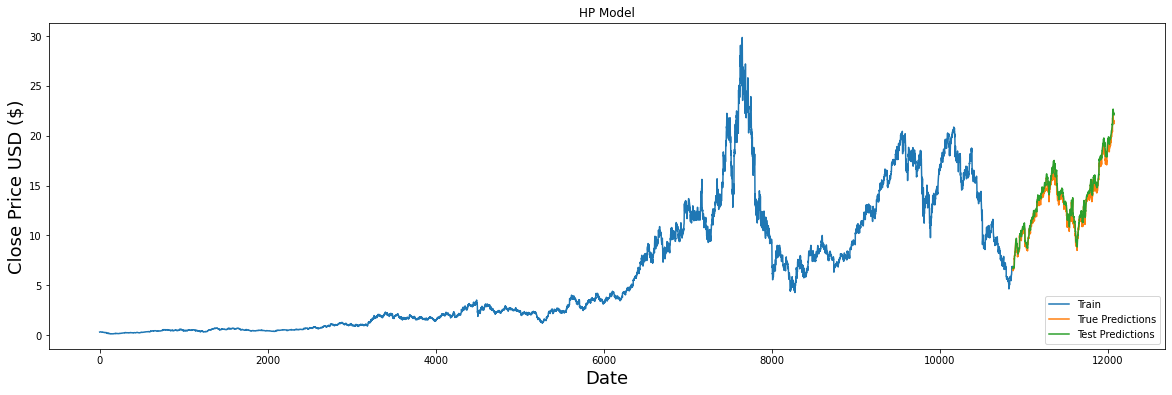

In [17]:
# Plot the data
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,6))
plt.title('HP Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'True Predictions', 'Test Predictions'], loc='lower right')
plt.show()

In [18]:
print(len(train))
print(len(valid))
print(len(train) + len(valid))
print(len(data))

10868
1207
12075
12075


In [19]:
df.head()
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,0.30627,0.30627,0.30627,0.30627,2441124,0
1,1970-01-05,0.30627,0.31768,0.30627,0.31385,6219848,0
2,1970-01-06,0.31385,0.31385,0.30996,0.30996,4447522,0
3,1970-01-07,0.31385,0.31385,0.31385,0.31385,1872638,0
4,1970-01-08,0.31385,0.31768,0.31385,0.31385,4280330,0
...,...,...,...,...,...,...,...
12070,2017-11-06,21.47000,21.53000,21.38000,21.44000,13309476,0
12071,2017-11-07,21.47000,21.47000,21.32000,21.38000,6245536,0
12072,2017-11-08,21.34000,21.47000,21.24000,21.42000,6061868,0
12073,2017-11-09,21.27000,21.40000,21.15000,21.34000,5844935,0


In [20]:
train

,Close
0,0.30627
1,0.31385
2,0.30996
3,0.31385
4,0.31385
...,...
10863,6.79700
10864,6.79700
10865,6.78880
10866,6.80090


In [21]:
valid

,Close,Predictions
10868,6.5532,6.807040
10869,6.5972,6.727535
10870,6.5770,6.692564
10871,6.4652,6.688833
10872,6.6372,6.657203
...,...,...
12070,21.4400,22.227455
12071,21.3800,22.208191
12072,21.4200,22.158464
12073,21.3400,22.154427


## GRU

In [22]:
# from keras.layers import GRU, Input

# def GRU_Exp():
#     model = Sequential()

#     model.add(GRU(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
#     model.add(Dropout(DROPOUT_UNIT))

#     # model.add(GRU(units = 64, return_sequences= True))
#     # model.add(Dropout(DROPOUT_UNIT))

#     # model.add(GRU(units= 64, return_sequences= True))
#     # model.add(Dropout(DROPOUT_UNIT))
    
#     model.add(GRU(units= 64, return_sequences= True))
#     model.add(Dropout(DROPOUT_UNIT))
    
#     model.add(GRU(units= 64, return_sequences= True))
#     model.add(Dropout(DROPOUT_UNIT))
    
#     model.add(GRU(units = 64))
#     model.add(Dropout(DROPOUT_UNIT))

#     model.add(Dense(1, activation='linear'))

#     return model

In [23]:
# gru_model = GRU_Exp()
# gru_model.summary()
# gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')

In [24]:
# gru_model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

In [25]:
# test_data = scaled_dataset[train_size - prediction_days: , :]
# x_test = []
# y_test = dataset[train_size:, :]
# for i in range(prediction_days, len(test_data)):
#     x_test.append(test_data[i-prediction_days:i, 0])


# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predictions = gru_model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)

# new_ytest = scaler.inverse_transform(y_test)

# rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# rmse

In [ ]:
# f1, precision, recall = f1_score(predictions, new_ytest)

In [ ]:
# # Plot the data
# train = data[:train_size]
# valid = data[train_size:]
# valid['Predictions'] = predictions

# plt.figure(figsize=(20,6))
# plt.title('HP Model')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price USD ($)', fontsize=18)

# plt.plot(train['Close'])
# plt.plot(valid[['Close', 'Predictions']])
# plt.legend(['Train', 'True Predictions', 'Test Predictions'], loc='lower right')
# plt.show()